## Download Libraries

In [ ]:
#!pip install azure-cognitiveservices-vision-computervision

In [1]:
import os
import sys

In [2]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

region = 'eastus'
key = 'keykeykey'

credentials = CognitiveServicesCredentials(key)
client = ComputerVisionClient(
    endpoint = 'https://rajcomputervision1.cognitiveservices.azure.com/',
    credentials = credentials
)

## Extract Text From Aadhaar Card

In [9]:
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes

url = r'E:\PYTHONCLASSTF\PrakashSenapati\2024_12_03_Azure_AI_Service\uidai1.PNG'
filename = 'uidai1.PNG'
raw = True
numberOfCharsInOperationId = 36

type = 'filename'
if type == 'url':
    rawHttpResponse = client.read(url, language='en', raw=True)
else: 
    read_image = open(filename, 'rb')
    rawHttpResponse = client.read_in_stream(read_image, language='en', raw=True)

In [10]:
import time

# Get ID from returned headers
operationLocation = rawHttpResponse.headers['Operation-Location']
idLocation = len(operationLocation) - numberOfCharsInOperationId
operationId = operationLocation[idLocation:]

# SDK call
while True:
    # get_read_result() is asynchronous, need to check when it finishes
    result = client.get_read_result(operationId)
    if result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

In [11]:
# verify call is actually finished
result.status

<OperationStatusCodes.succeeded: 'succeeded'>

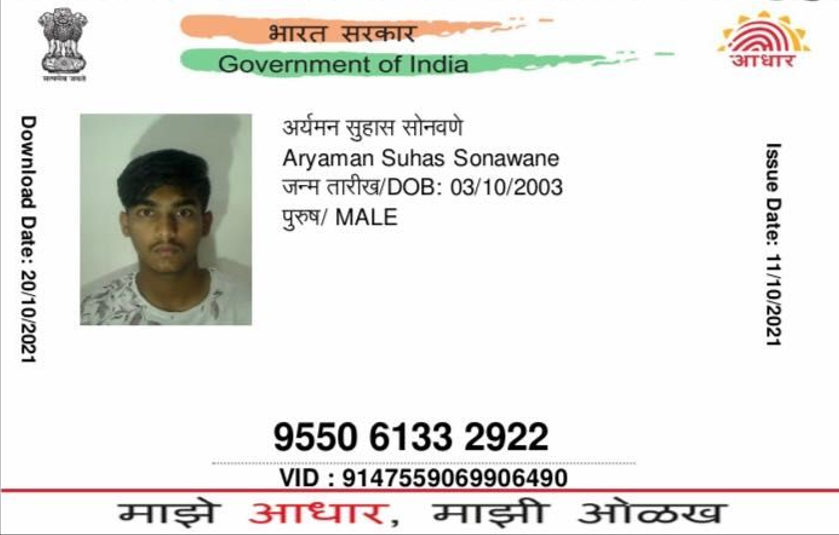

In [12]:
from PIL import Image, ImageDraw
image=Image.open('uidai1.PNG')
image

In [13]:
# Get data
if result.status == OperationStatusCodes.succeeded:
    for line in result.analyze_result.read_results[0].lines:
        print(line.text)
        # print(line.bounding_box)

HRE HOR
Government of India
BITER
Download Date: 20/10/2021
Issue Date: 11/10/2021
Aryaman Suhas Sonawane
THAT/DOB: 03/10/2003
359/ MALE
9550 6133 2922
VID : 9147559069906490


## Extract Text From PAN Card

In [14]:
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes

url = r'E:\PYTHONCLASSTF\PrakashSenapati\2024_12_03_Azure_AI_Service\pancard.jpg'
filename = 'pancard.jpg'
raw = True
numberOfCharsInOperationId = 36

type = 'filename'
if type == 'url':
    rawHttpResponse = client.read(url, language='en', raw=True)
else: 
    read_image = open(filename, 'rb')
    rawHttpResponse = client.read_in_stream(read_image, language='en', raw=True)

In [15]:
import time
# Get ID from returned headers
operationLocation = rawHttpResponse.headers['Operation-Location']
idLocation = len(operationLocation) - numberOfCharsInOperationId
operationId = operationLocation[idLocation:]

# SDK call
while True:
    # get_read_result() is asynchronous, need to check when it finishes
    result = client.get_read_result(operationId)
    if result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

In [16]:
result.status

<OperationStatusCodes.succeeded: 'succeeded'>

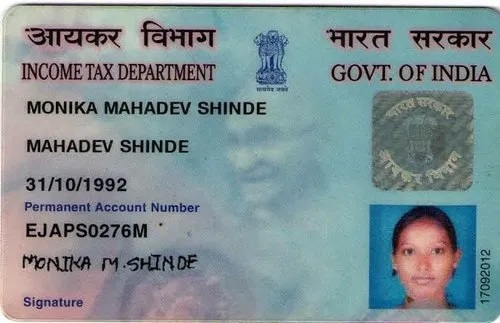

In [17]:
from PIL import Image, ImageDraw
image=Image.open('pancard.jpg')
image

In [18]:
# Get data
if result.status == OperationStatusCodes.succeeded:
    for line in result.analyze_result.read_results[0].lines:
        print(line.text)
        # print(line.bounding_box)

INCOME TAX DEPARTMENT
GOVT. OF INDIA
MONIKA MAHADEV SHINDE
MAHADEV SHINDE
31/10/1992
Permanent Account Number
EJAPS0276M
MONIKA M. SHINDE
Signature
17092012
